<h2>Import Libs</h2>

In [ ]:
# working with the data and vizualization tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pre- processing
from sklearn.preprocessing import StandardScaler

# K-cross validation
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# model evaluation
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score

# seed
RSEED = 10

#saving models as plk files
from joblib import Parallel, delayed
import joblib

Printing configuration

In [ ]:
#print float number with 6 digit after the decimal point
pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [ ]:
# helper functions

def k_cross_validation(x_features, y_label, k):
  """
  create 10 varsions of the train-test data with ratio of 90:10
  """
  # Split the dataset into 10 folds
  kf = KFold(n_splits=k, shuffle=True)
  # k-cross validation splits list
  kcv_list = []

  # Iterate through the folds
  for train_index, test_index in kf.split(x_features):
      # Split the train and test sets
      print(train_index)
      X_train, X_test = x_features.iloc[train_index,:], x_features.iloc[test_index,:]
      y_train, y_test = y_label.iloc[train_index], y_label.iloc[test_index]
      batch = [X_train, y_train, X_test, y_test]
      kcv_list.append(batch)
  return kcv_list

<h2>Data pre-processing and visualization</h2>

In [ ]:
docs_df = pd.read_csv("../../ClassificationModelsDatasets/Concatenated-DF.csv")

In [ ]:
docs_df

,Unnamed: 0,bibliometr,analysi,explain,artifici,intellig,field,jose,alonso,ciro,...,dittrich,geppert,448â€“461,sluy,remesh,strain,asolid,447â€“467,08468stat,Y-LABEL
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,1,0.000000,0.115750,0.000000,0.000000,0.000000,0.154671,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,2,0.000000,0.115750,0.000000,0.000000,0.000000,0.245148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
96,96,0.000000,0.146061,0.000000,0.000000,0.000000,0.309343,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
97,97,1.596030,0.000000,0.000000,0.000000,0.000000,0.245148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
98,98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [ ]:
# remove first col-(number of row(irrelevant))
docs_df= docs_df.iloc[:,1:]

In [ ]:
# normalazie the x-features
scaler = StandardScaler()
x_features = docs_df.iloc[:,0:30089]
x_features_scaled = scaler.fit_transform(x_features)

# concanted with the y-label
scaled_df = np.concatenate((x_features_scaled, docs_df.iloc[:,-1:]), axis=1)

<h3>Dimensionality Reduction</h3>
After we normalize our data, lets try to extract the relavant features from it by using PCA. It will also help us to visualize our data.

In [ ]:
# lets choose the create 75 components
components = 75

pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(x_features_scaled)

PCA(n_components=75)

In [ ]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[7.57385783 4.44076547 3.73217867 3.42490006 3.24224376 2.86480163
 2.44396636 2.29263574 2.16123778 2.03220527 1.90546534 1.88067925
 1.85761276 1.76823421 1.71446056 1.52729472 1.48043767 1.45790901
 1.3970839  1.37401116 1.32423955 1.3078687  1.29449377 1.27353943
 1.2633941  1.25230138 1.23922252 1.22886805 1.21161148 1.15306194
 1.12472933 1.10955362 1.06925867 1.05543702 1.01005523 0.98767851
 0.95032589 0.9412557  0.9138128  0.89499267 0.87649758 0.85057149
 0.83002146 0.81010374 0.77661575 0.7676186  0.75311628 0.74507415
 0.72731481 0.7185142  0.69542005 0.67465709 0.66411032 0.65261434
 0.64467892 0.62691464 0.60572277 0.60132111 0.5793969  0.56537248
 0.55282382 0.54105648 0.53546094 0.52410426 0.51576625 0.51350002
 0.49030963 0.48555091 0.47817469 0.46307814 0.45483481 0.44523514
 0.4389541  0.42460873 0.4048339 ]



In [ ]:
print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Cumulative Variances (Percentage):
[ 7.57385783 12.01462329 15.74680197 19.17170202 22.41394578 25.27874741
 27.72271377 30.01534951 32.17658729 34.20879255 36.11425789 37.99493714
 39.85254989 41.62078411 43.33524467 44.86253939 46.34297706 47.80088607
 49.19796997 50.57198113 51.89622068 53.20408938 54.49858315 55.77212258
 57.03551668 58.28781806 59.52704059 60.75590863 61.96752011 63.12058205
 64.24531138 65.354865   66.42412367 67.47956069 68.48961593 69.47729444
 70.42762032 71.36887603 72.28268882 73.1776815  74.05417908 74.90475057
 75.73477203 76.54487577 77.32149152 78.08911012 78.8422264  79.58730055
 80.31461536 81.03312956 81.72854961 82.4032067  83.06731702 83.71993136
 84.36461028 84.99152493 85.5972477  86.19856881 86.77796571 87.34333818
 87.89616201 88.43721848 88.97267942 89.49678369 90.01254994 90.52604997
 91.0163596  91.50191051 91.9800852  92.44316334 92.89799815 93.34323329
 93.78218739 94.20679612 94.61163002]



Text(0, 0.5, 'Explained variance (%)')

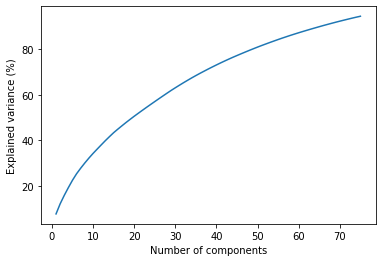

In [ ]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")


As we can see we can explain about 95% of the varience in the data using 75 principal components. using those 75 components we can train our model
using much less features and therefore:
- train our models much faster.
- avoid to complex model that tend to overfitting.

In [ ]:
# extract 75 PC's from our x-features
X_pca = pca.transform(x_features_scaled)
print(X_pca.shape)

(100, 75)


In [ ]:
# concanted with the y-label
train_test_data = np.concatenate((X_pca, docs_df.iloc[:,-1:]), axis=1)
train_test_data.shape

(100, 76)

<h3>Visualize the data using T-sne</h3>

In [ ]:
tsne = TSNE()
# transform the x- features
X_embedded = tsne.fit_transform(train_test_data[:,:75])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
# concanted with the y-label
embedded_df = np.concatenate((X_embedded, docs_df.iloc[:,-1:]), axis=1)

In [ ]:
# rename y-col
embedded_df = pd.DataFrame(embedded_df)
embedded_df.rename(columns={2: 'Category'}, inplace=True)

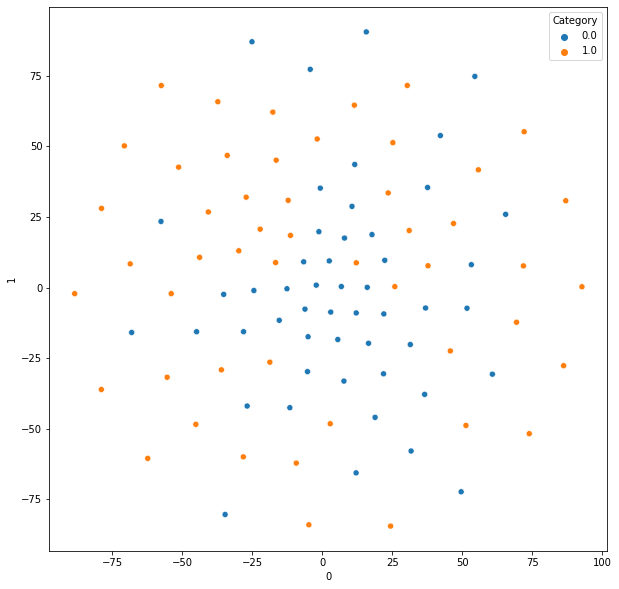

In [ ]:
# create plot
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedded_df, x=0, y=1, hue='Category')

It seems like our categories(belong to explaing AI(1), not belong to explaing Ai(0)), are not linearly separated.

<h3>K-cross validation<h3>

In [ ]:
"../ClassificationModelsDatasets/Concatenated-DF.csv"# using k = 10
kcv_list = k_cross_validation(x_features=pd.DataFrame(train_test_data[:,:75]), y_label=docs_df.iloc[:,-1:], k=10)

<h2>Applying classification models</h2>

<h3>KNN</h3>

In [ ]:
best_classifier_knn = None
best_accu_knn = 0
best_x_test_knn = None
best_y_test_knn = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  knn = KNeighborsClassifier()

  # define parameter grid
  parameters_grid = {
      'n_neighbors': [ 3, 5, 10],
      'weights': ['uniform', 'distance']
  }

  # define grid search
  grid_search = GridSearchCV(estimator=knn, param_grid=parameters_grid)


  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_knn:
    best_accu_knn = acc
    best_classifier_knn = best
    best_x_test_knn = x_test
    best_y_test_knn = y_test

<H3>Evaluate the model</H3>

In [ ]:
print("KNN best classifier accuracy is {}".format(best_accu_knn))

KNN best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


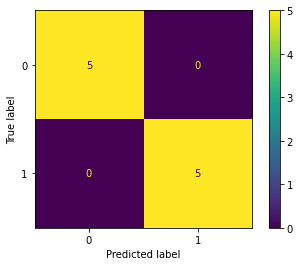

,sensitivity,specificity
0,1.000000,1.000000


In [ ]:
# confusion matrix
y_pred = best_classifier_knn.predict(best_x_test_knn)
plot_confusion_matrix(best_classifier_knn, best_x_test_knn, best_y_test_knn)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_knn, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>SVM</h3>

In [ ]:
best_classifier_SVM = None
best_accu_SVM = 0
best_x_test_SVM = None
best_y_test_SVM = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]
  # normalize x-features
  sc = StandardScaler()
  x_train = sc.fit_transform(x_train)
  x_test = sc.fit_transform(x_test)

  clf = svm.SVC(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'C': [0.1, 0.5,0.7,1.2,1.5,20,40,60],
      'kernel': ['linear', 'poly','rbf', 'sigmoid'],
      'degree': [3,4],

  }

  # define grid search
  grid_search = GridSearchCV(estimator=clf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_SVM:
    best_accu_SVM = acc
    best_classifier_SVM = best
    best_x_test_SVM = x_test
    best_y_test_SVM = y_test

<H3>Evaluate the model</H3>

In [ ]:
print("SVM best classifier accuracy is {}".format(best_accu_SVM))

SVM best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


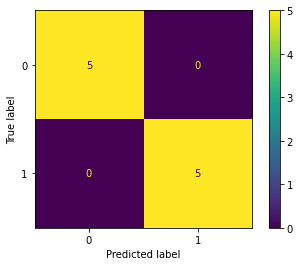

,sensitivity,specificity
0,1.000000,1.000000


In [ ]:
# confusion matrix
y_pred = best_classifier_SVM.predict(best_x_test_SVM)
plot_confusion_matrix(best_classifier_SVM, best_x_test_SVM, best_y_test_SVM)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_SVM, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Random Forest</h3>

In [ ]:
best_classifier_RF = None
best_accu_RF = 0
best_x_test_RF = None
best_y_test_RF = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define model
  rf = RandomForestClassifier(random_state=RSEED)

  # define parameter grid
  parameters_grid = {
      'max_depth': [2, 3, 4, 6],
      'min_samples_split': [2, 4, 8],
      'min_samples_leaf': [2, 8],
      'n_estimators': [50,70,100]
  }
   # define grid search
  grid_search = GridSearchCV(estimator=rf, param_grid=parameters_grid)



  # fit estimator
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_RF:
    best_accu_RF = acc
    best_classifier_RF = best
    best_x_test_RF = x_test
    best_y_test_RF = y_test

<h3>Evaluate the model</h3>

In [ ]:
print("Random forest best classifier accuracy is {}".format(best_accu_RF))

Random forest best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


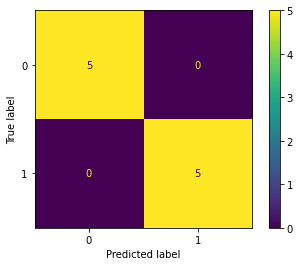

,sensitivity,specificity
0,1.000000,1.000000


In [ ]:
# confusion matrix
y_pred = best_classifier_RF.predict(best_x_test_RF)
plot_confusion_matrix(best_classifier_RF, best_x_test_RF, best_y_test_RF)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_RF, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Navie Bayes</h3>

In [ ]:
best_classifier_NB = None
best_accu_NB = 0
best_x_test_NB = None
best_y_test_NB = None

for batch in kcv_list:
  x_train = batch[0]
  y_train = batch[1]
  x_test = batch[2]
  y_test = batch[3]

  # define parameter grid
  param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
  }

  # define and train the model
  grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, n_jobs=-1)
  grid_search.fit(x_train, y_train)

  # get best estimator
  best = grid_search.best_estimator_

  # predict
  y_pred = best.predict(x_test)


  # calculate accuracy
  acc = round(accuracy_score(y_test, y_pred), 3)

  # update best classifier
  if acc > best_accu_NB:
    best_accu_NB = acc
    best_classifier_NB = best
    best_x_test_NB = x_test
    best_y_test_NB = y_test

<h3>Evaluate the model</h3>

In [ ]:
print("Navie Bayes best classifier accuracy is {}".format(best_accu_NB))

Navie Bayes best classifier accuracy is 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


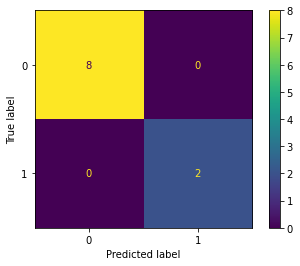

,sensitivity,specificity
0,1.000000,1.000000


In [ ]:
# confusion matrix
y_pred = best_classifier_NB.predict(best_x_test_NB)
plot_confusion_matrix(best_classifier_NB, best_x_test_NB, best_y_test_NB)
plt.show()

tp, fn, fp, tn = confusion_matrix(best_y_test_NB, y_pred).ravel()
eval_Df = {"sensitivity": tp/(tp+fn), "specificity": tn/(tn+fp)}
pd.DataFrame(data=eval_Df, index=[0])

<h3>Summery</h3>
Overall it seems that most of the classifiers managed to learn well from<br>
our representaion of the data and achived the highest accuracy, 

In [ ]:
# saving the best classifiers of all the 4 models
joblib.dump(best_classifier_knn, '../../TrainedClassificationModels/KNN_classifier.pkl')
joblib.dump(best_classifier_SVM, '../../TrainedClassificationModels/SVM_classifier.pkl')
joblib.dump(best_classifier_RF, '../../TrainedClassificationModels/RF_classifier.pkl')
joblib.dump(best_classifier_NB, '../../TrainedClassificationModels/NB_classifier.pkl')

['/content/drive/MyDrive/Colab Notebooks/NB_classifier.pkl']